# **Dataset**

In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import transforms
from PIL import Image
import os
import copy
from tqdm import tqdm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip '/content/drive/MyDrive/archive(1).zip'
!unzip '/content/drive/MyDrive/archive(2).zip'

Streaming output truncated to the last 5000 lines.
  inflating: Training/glioma/Tr-gl_0712.jpg  
  inflating: Training/glioma/Tr-gl_0713.jpg  
  inflating: Training/glioma/Tr-gl_0714.jpg  
  inflating: Training/glioma/Tr-gl_0715.jpg  
  inflating: Training/glioma/Tr-gl_0716.jpg  
  inflating: Training/glioma/Tr-gl_0717.jpg  
  inflating: Training/glioma/Tr-gl_0718.jpg  
  inflating: Training/glioma/Tr-gl_0719.jpg  
  inflating: Training/glioma/Tr-gl_0720.jpg  
  inflating: Training/glioma/Tr-gl_0721.jpg  
  inflating: Training/glioma/Tr-gl_0722.jpg  
  inflating: Training/glioma/Tr-gl_0723.jpg  
  inflating: Training/glioma/Tr-gl_0724.jpg  
  inflating: Training/glioma/Tr-gl_0725.jpg  
  inflating: Training/glioma/Tr-gl_0726.jpg  
  inflating: Training/glioma/Tr-gl_0727.jpg  
  inflating: Training/glioma/Tr-gl_0728.jpg  
  inflating: Training/glioma/Tr-gl_0729.jpg  
  inflating: Training/glioma/Tr-gl_0730.jpg  
  inflating: Training/glioma/Tr-gl_0731.jpg  
  inflating: Training/glioma/

In [ ]:


#Training

path='/content/Training/'
dir_lst=os.listdir(path)
print(len(dir_lst))
print(dir_lst)
brain_list=[]

for i in range(0,len(dir_lst)):
  lst=dir_lst[i]
  if(lst=="no_tumor") or (lst=="notumor"):
    pth=path+lst+'/'
    no_lst=os.listdir(pth)
    for x in no_lst:
      brain_list.append([pth+x, 'no'])
    print('no',len(brain_list))

  else:
    pth=path+lst+'/'
    yes_lst=os.listdir(pth)
    for x in yes_lst:
      brain_list.append([pth+x, 'yes'])
    print('yes',len(brain_list))


display(len(brain_list))
df = pd.DataFrame(brain_list, columns=['images', 'labels'])


#Testing
path='/content/Testing/'
dir_lst=os.listdir(path)
print(len(dir_lst))
print(dir_lst)
brain_list=[]

for i in range(0,len(dir_lst)):
  lst=dir_lst[i]
  if(lst=="no_tumor") or (lst=="notumor"):
    pth=path+lst+'/'
    no_lst=os.listdir(pth)
    for x in no_lst:
      brain_list.append([pth+x, 'no'])
    print('no',len(brain_list))

  else:
    pth=path+lst+'/'
    yes_lst=os.listdir(pth)
    for x in yes_lst:
      brain_list.append([pth+x,'yes'])
    print('yes',len(brain_list))


display(len(brain_list))
df1 = pd.DataFrame(brain_list, columns=['images', 'labels'])

8
['pituitary', 'meningioma', 'meningioma_tumor', 'pituitary_tumor', 'glioma_tumor', 'no_tumor', 'glioma', 'notumor']
yes 1457
yes 2796
yes 3618
yes 4445
yes 5271
no 5666
yes 6987
no 8582


8582

8
['pituitary', 'meningioma', 'meningioma_tumor', 'pituitary_tumor', 'glioma_tumor', 'no_tumor', 'glioma', 'notumor']
yes 300
yes 606
yes 721
yes 795
yes 895
no 1000
yes 1300
no 1705


1705

In [ ]:
print(len(df))
df.to_csv('Brain_tumourTr.csv')

print(len(df1))
df1.to_csv('Brain_tumourTe.csv')


8582
1705


# **Data Pre processing**

In [ ]:
def create_dataset(X,y):
  X_=[]
  y_=[]
  transform = transforms.Compose([transforms.ToPILImage(),transforms.Grayscale(num_output_channels=3),
    transforms.Resize((224 ,224)),
    transforms.ToTensor()])

  for idx in range(0,len(X)):

    img=plt.imread(X[idx])
    img=transform(img.astype(np.uint8))
    if(y[idx]=='no'):

      X_.append(img)
      y_.append(0)
    else:

      X_.append(img)
      y_.append(1)


  return torch.stack(X_),torch.Tensor(y_)



In [ ]:
def sample_iid(dataset, num_users):
    num_items = int(len(dataset)/num_users)
    dict_users, all_idxs = {}, [i for i in range(len(dataset))]
    for i in range(num_users):
        dict_users[i] = set(np.random.choice(all_idxs, num_items,
                                             replace=False))
        all_idxs = list(set(all_idxs) - dict_users[i])
    return dict_users

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import transforms
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split

dataTr=pd.read_csv('/content/Brain_tumourTr.csv')
dataTe=pd.read_csv('/content/Brain_tumourTe.csv')

x_train, y_train = dataTr['images'],dataTr['labels']
x_test, y_test = dataTe['images'],dataTe['labels']

x_val = [x_train[i] for i in range(4000,8582)]
y_val = [y_train[i] for i in range(4000,8582)]
x_train = x_train[:4000]
y_train = y_train[:4000]



del dataTr, dataTe

train_data = create_dataset(x_train.to_list(),y_train.to_list())
test_data = create_dataset(x_test.tolist(),y_test.to_list())
val_data = create_dataset(x_val,y_val)
user_groups = sample_iid(train_data[1],3)


In [ ]:
print(test_data[0].shape,test_data[1].shape)
print(type(test_data[0]),type(test_data[1]))#len(test_data))
print(user_groups)

torch.Size([1705, 3, 224, 224]) torch.Size([1705])
<class 'torch.Tensor'> <class 'torch.Tensor'>
{0: {1, 2, 3, 7, 16, 17, 19, 20, 21, 23, 29, 33, 34, 36, 37, 39, 45, 47, 49, 50, 53, 55, 57, 58, 59, 60, 68, 73, 76, 78, 80, 86, 87, 90, 94, 96, 99, 104, 106, 111, 112, 114, 115, 116, 117, 118, 121, 137, 140, 144, 145, 146, 148, 150, 153, 160, 163, 168, 175, 179, 181, 183, 185, 187, 188, 189, 191, 195, 196, 198, 201, 202, 204, 206, 210, 212, 223, 224, 228, 229, 233, 236, 238, 240, 241, 242, 244, 249, 252, 254, 259, 262, 266, 270, 275, 280, 281, 285, 287, 301, 302, 303, 306, 309, 310, 313, 317, 322, 324, 328, 331, 335, 336, 339, 340, 348, 349, 351, 355, 357, 358, 361, 363, 367, 368, 371, 372, 374, 378, 380, 385, 386, 388, 394, 398, 399, 401, 402, 410, 411, 413, 414, 415, 417, 424, 428, 429, 431, 432, 434, 435, 436, 438, 440, 444, 445, 446, 456, 458, 459, 464, 465, 466, 467, 470, 473, 475, 477, 480, 484, 487, 492, 494, 495, 496, 498, 503, 504, 506, 509, 511, 514, 518, 520, 522, 528, 529, 530,

# **Define the CNN model**

In [ ]:

# Step 2: Define the architecture
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=2, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=1,stride=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=2, padding=1)
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=2, padding=1)
        self.conv4 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=2, padding=1)
        self.fc1 = nn.Linear(128 * 14 * 14, 1024)
        self.fc2 = nn.Linear(1024, 2)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.pool(torch.relu(self.conv3(x)))
        x = self.pool(torch.relu(self.conv4(x)))
        x = x.view(-1, 128 * 14 * 14)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

class DatasetSplit:
  def __init__(self, dataset, idxs):
      self.dataset = dataset

      self.idxs = [int(i) for i in idxs]

  def __len__(self):
      return len(self.idxs)

  def __getitem__(self, item):
      image, label = self.dataset[0][self.idxs[item]] , self.dataset[1][self.idxs[item]]
      return image, label


class LocalUpdate(object):
    def __init__(self,dataset, idxs):

        self.trainloader, self.validloader, self.testloader = self.train_val_test(
            dataset, list(idxs))
        self.device = 'cpu'
        self.criterion = nn.CrossEntropyLoss().to(self.device)

    def train_val_test(self, dataset, idxs):

        # split indexes for train, validation, and test (80, 10, 10)
        idxs_train = idxs[:int(0.8*len(idxs))]
        idxs_val = idxs[int(0.8*len(idxs)):int(0.9*len(idxs))]
        idxs_test = idxs[int(0.9*len(idxs)):]

        trainloader = DataLoader(DatasetSplit(dataset, idxs_train),
                                 batch_size=64, shuffle=True)
        validloader = DataLoader(DatasetSplit(dataset, idxs_val),
                                 batch_size=int(len(idxs_val)/10), shuffle=False)
        testloader = DataLoader(DatasetSplit(dataset, idxs_test),
                                batch_size=int(len(idxs_test)/10), shuffle=False)
        return trainloader, validloader, testloader

    def update_weights(self, model, global_round):
        # Set mode to train model
        model.train()
        epoch_loss = []

        # Set optimizer for the local updates
        #optimizer == 'sgd':
        optimizer = torch.optim.SGD(model.parameters(), lr=0.0001,
                                        momentum=0.5)
        #optimizer == 'adam':
        '''optimizer = torch.optim.Adam(model.parameters(), lr=0.1,
                                         weight_decay=1e-4)'''

        for iter in range(5):
            batch_loss = []
            for batch_idx, (images, labels) in enumerate(self.trainloader):
                images, labels = images.to(self.device), labels.to(self.device)
                model.zero_grad()
                log_probs = model(images)
                loss = self.criterion(log_probs, labels.to(torch.int64))
                loss.backward()
                optimizer.step()

                if (batch_idx % 10 == 0):
                    print('| Global Round : {} | Local Epoch : {} | [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                        global_round, iter, batch_idx * len(images),
                        len(self.trainloader.dataset),
                        100. * batch_idx / len(self.trainloader), loss.item()))
                # self.logger.add_scalar('loss', loss.item())
                batch_loss.append(loss.item())
            epoch_loss.append(sum(batch_loss)/len(batch_loss))

        return model.state_dict(), sum(epoch_loss) / len(epoch_loss)

    def inference(self, model):

        model.eval()
        loss, total, correct = 0.0, 0.0, 0.0

        for batch_idx, (images, labels) in enumerate(self.testloader):
            images, labels = images.to(self.device), labels.to(self.device)

            # Inference
            outputs = model(images)
            batch_loss = self.criterion(outputs, labels.to(torch.int64))
            loss += batch_loss.item()

            # Prediction
            _, pred_labels = torch.max(outputs, 1)
            pred_labels = pred_labels.view(-1)
            correct += torch.sum(torch.eq(pred_labels, labels.to(torch.int64))).item()
            total += len(labels)

        accuracy = correct/total
        return accuracy, loss

def average_weights(w):

    w_avg = copy.deepcopy(w[0])
    for key in w_avg.keys():
        for i in range(1, len(w)):
            w_avg[key] += w[i][key]
        w_avg[key] = torch.div(w_avg[key], len(w))
    return w_avg




In [ ]:
 # Training

train_loss, train_accuracy = [], []
val_acc_list, net_list = [], []
cv_loss, cv_acc = [], []
val_loss_pre, counter = 0, 0

global_model = CNNModel()
#epochs=[5,10,15,20,25]

#for x in epochs:
for epoch in tqdm(range(20)):
  local_weights, local_losses = [], []
  print(f'\n | Global Training Round : {epoch+1} |\n')

  global_model.train()
  m = max(int(0.5* 3), 1)
  idxs_users = np.random.choice(range(3), m, replace=False)

  for idx in idxs_users:
    local_model = LocalUpdate(dataset=train_data, idxs=user_groups[idx])
    w, loss = local_model.update_weights(
        model=copy.deepcopy(global_model), global_round=epoch)
    local_weights.append(copy.deepcopy(w))
    local_losses.append(copy.deepcopy(loss))

  # update global weights
  global_weights = average_weights(local_weights)

  # update global weights
  global_model.load_state_dict(global_weights)
  loss_avg = sum(local_losses) / len(local_losses)
  train_loss.append(loss_avg)

  # Calculate avg training accuracy over all users at every epoch
  list_acc, list_loss = [], []
  global_model.eval()
  for c in range(3):
    local_model = LocalUpdate(dataset=train_data, idxs=user_groups[idx])
    acc, loss = local_model.inference(model=global_model)
    list_acc.append(acc)
    list_loss.append(loss)
  train_accuracy.append(sum(list_acc)/len(list_acc))
  # print global training loss after every 'i' rounds
  #if (epoch+1) % 2 == 0:
  print(f' \nAvg Training Stats after {epoch+1} global rounds:')
  print(f'Training Loss : {np.mean(np.array(train_loss))}')
  print('Train Accuracy: {:.2f}% \n'.format(100*train_accuracy[-1]))
  net_list.append(100*train_accuracy[-1])


  loss, total, correct = 0.0, 0.0, 0.0

  device = 'cpu'
  criterion = nn.CrossEntropyLoss().to(device)
  idxs=[i for i in range(0,len(val_data[0]))]
  valloader = DataLoader(DatasetSplit(val_data, idxs), batch_size=128,
                          shuffle=True)
  images,labels =val_data[0],val_data[1]

  for batch_idx, (images, labels) in enumerate(valloader):
      images, labels = images.to(device), labels.to(device)
      labels=labels.type(torch.LongTensor)
      # Inference
      outputs = global_model(images)
      batch_loss = criterion(outputs, labels)
      loss += batch_loss.item()

      # Prediction
      _, pred_labels = torch.max(outputs, 1)
      pred_labels = pred_labels.view(-1)
      correct += torch.sum(torch.eq(pred_labels, labels.type(torch.LongTensor))).item()
      total += len(labels)

  accuracy = correct/total
  cv_loss.append(loss/total)
  val_acc_list.append(accuracy)
  print(f' \nAvg Validation Stats after {epoch+1} global rounds:')
  print(f'Validation Loss : {np.mean(np.array(cv_loss))}')
  print('Validation Accuracy: {:.2f}% \n'.format(100*val_acc_list[-1]))

print(f'Avg Training Loss : {np.mean(np.array(train_loss))}')
print(f'Avg Validation Loss : {np.mean(np.array(cv_loss))}')

  0%|          | 0/20 [00:00<?, ?it/s]


 | Global Training Round : 1 |

| Global Round : 0 | Local Epoch : 0 | [0/1066 (0%)]	Loss: 0.690582
| Global Round : 0 | Local Epoch : 0 | [640/1066 (59%)]	Loss: 0.686462
| Global Round : 0 | Local Epoch : 1 | [0/1066 (0%)]	Loss: 0.683323
| Global Round : 0 | Local Epoch : 1 | [640/1066 (59%)]	Loss: 0.678830
| Global Round : 0 | Local Epoch : 2 | [0/1066 (0%)]	Loss: 0.675778
| Global Round : 0 | Local Epoch : 2 | [640/1066 (59%)]	Loss: 0.671442
| Global Round : 0 | Local Epoch : 3 | [0/1066 (0%)]	Loss: 0.668403
| Global Round : 0 | Local Epoch : 3 | [640/1066 (59%)]	Loss: 0.664119
| Global Round : 0 | Local Epoch : 4 | [0/1066 (0%)]	Loss: 0.661153
| Global Round : 0 | Local Epoch : 4 | [640/1066 (59%)]	Loss: 0.656883
 
Avg Training Stats after 1 global rounds:
Training Loss : 0.6724161961499383
Train Accuracy: 100.00% 



  5%|▌         | 1/20 [02:59<56:46, 179.27s/it]

 
Avg Validation Stats after 1 global rounds:
Validation Loss : 0.005412731015593763
Validation Accuracy: 56.57% 


 | Global Training Round : 2 |

| Global Round : 1 | Local Epoch : 0 | [0/1066 (0%)]	Loss: 0.654107
| Global Round : 1 | Local Epoch : 0 | [640/1066 (59%)]	Loss: 0.650463
| Global Round : 1 | Local Epoch : 1 | [0/1066 (0%)]	Loss: 0.647592
| Global Round : 1 | Local Epoch : 1 | [640/1066 (59%)]	Loss: 0.643708
| Global Round : 1 | Local Epoch : 2 | [0/1066 (0%)]	Loss: 0.640977
| Global Round : 1 | Local Epoch : 2 | [640/1066 (59%)]	Loss: 0.637245
| Global Round : 1 | Local Epoch : 3 | [0/1066 (0%)]	Loss: 0.634445
| Global Round : 1 | Local Epoch : 3 | [640/1066 (59%)]	Loss: 0.630753
| Global Round : 1 | Local Epoch : 4 | [0/1066 (0%)]	Loss: 0.628103
| Global Round : 1 | Local Epoch : 4 | [640/1066 (59%)]	Loss: 0.624516
 
Avg Training Stats after 2 global rounds:
Training Loss : 0.6552427439128652
Train Accuracy: 100.00% 



 10%|█         | 2/20 [05:54<53:07, 177.10s/it]

 
Avg Validation Stats after 2 global rounds:
Validation Loss : 0.005403226260169007
Validation Accuracy: 56.57% 


 | Global Training Round : 3 |

| Global Round : 2 | Local Epoch : 0 | [0/1066 (0%)]	Loss: 0.621933
| Global Round : 2 | Local Epoch : 0 | [640/1066 (59%)]	Loss: 0.618690
| Global Round : 2 | Local Epoch : 1 | [0/1066 (0%)]	Loss: 0.616142
| Global Round : 2 | Local Epoch : 1 | [640/1066 (59%)]	Loss: 0.612403
| Global Round : 2 | Local Epoch : 2 | [0/1066 (0%)]	Loss: 0.609856
| Global Round : 2 | Local Epoch : 2 | [640/1066 (59%)]	Loss: 0.606460
| Global Round : 2 | Local Epoch : 3 | [0/1066 (0%)]	Loss: 0.603743
| Global Round : 2 | Local Epoch : 3 | [640/1066 (59%)]	Loss: 0.600307
| Global Round : 2 | Local Epoch : 4 | [0/1066 (0%)]	Loss: 0.597602
| Global Round : 2 | Local Epoch : 4 | [640/1066 (59%)]	Loss: 0.594021
 
Avg Training Stats after 3 global rounds:
Training Loss : 0.6391745104509242
Train Accuracy: 100.00% 



 15%|█▌        | 3/20 [08:50<49:58, 176.41s/it]

 
Avg Validation Stats after 3 global rounds:
Validation Loss : 0.005396810608903654
Validation Accuracy: 56.57% 


 | Global Training Round : 4 |

| Global Round : 3 | Local Epoch : 0 | [0/1066 (0%)]	Loss: 0.591677
| Global Round : 3 | Local Epoch : 0 | [640/1066 (59%)]	Loss: 0.588415
| Global Round : 3 | Local Epoch : 1 | [0/1066 (0%)]	Loss: 0.585794
| Global Round : 3 | Local Epoch : 1 | [640/1066 (59%)]	Loss: 0.582293
| Global Round : 3 | Local Epoch : 2 | [0/1066 (0%)]	Loss: 0.579740
| Global Round : 3 | Local Epoch : 2 | [640/1066 (59%)]	Loss: 0.576346
| Global Round : 3 | Local Epoch : 3 | [0/1066 (0%)]	Loss: 0.573592
| Global Round : 3 | Local Epoch : 3 | [640/1066 (59%)]	Loss: 0.570324
| Global Round : 3 | Local Epoch : 4 | [0/1066 (0%)]	Loss: 0.567791
| Global Round : 3 | Local Epoch : 4 | [640/1066 (59%)]	Loss: 0.564181
 
Avg Training Stats after 4 global rounds:
Training Loss : 0.6236224537386614
Train Accuracy: 100.00% 



 20%|██        | 4/20 [11:47<47:05, 176.60s/it]

 
Avg Validation Stats after 4 global rounds:
Validation Loss : 0.005393447833308899
Validation Accuracy: 56.57% 


 | Global Training Round : 5 |

| Global Round : 4 | Local Epoch : 0 | [0/1066 (0%)]	Loss: 0.561565
| Global Round : 4 | Local Epoch : 0 | [640/1066 (59%)]	Loss: 0.558431
| Global Round : 4 | Local Epoch : 1 | [0/1066 (0%)]	Loss: 0.555778
| Global Round : 4 | Local Epoch : 1 | [640/1066 (59%)]	Loss: 0.552188
| Global Round : 4 | Local Epoch : 2 | [0/1066 (0%)]	Loss: 0.549899
| Global Round : 4 | Local Epoch : 2 | [640/1066 (59%)]	Loss: 0.546010
| Global Round : 4 | Local Epoch : 3 | [0/1066 (0%)]	Loss: 0.543678
| Global Round : 4 | Local Epoch : 3 | [640/1066 (59%)]	Loss: 0.540008
| Global Round : 4 | Local Epoch : 4 | [0/1066 (0%)]	Loss: 0.537338
| Global Round : 4 | Local Epoch : 4 | [640/1066 (59%)]	Loss: 0.533760
 
Avg Training Stats after 5 global rounds:
Training Loss : 0.608258438390844
Train Accuracy: 100.00% 



 25%|██▌       | 5/20 [14:48<44:32, 178.20s/it]

 
Avg Validation Stats after 5 global rounds:
Validation Loss : 0.0053929786685250935
Validation Accuracy: 56.57% 


 | Global Training Round : 6 |

| Global Round : 5 | Local Epoch : 0 | [0/1066 (0%)]	Loss: 0.531116
| Global Round : 5 | Local Epoch : 0 | [640/1066 (59%)]	Loss: 0.527866
| Global Round : 5 | Local Epoch : 1 | [0/1066 (0%)]	Loss: 0.525241
| Global Round : 5 | Local Epoch : 1 | [640/1066 (59%)]	Loss: 0.521536
| Global Round : 5 | Local Epoch : 2 | [0/1066 (0%)]	Loss: 0.518962
| Global Round : 5 | Local Epoch : 2 | [640/1066 (59%)]	Loss: 0.515245
| Global Round : 5 | Local Epoch : 3 | [0/1066 (0%)]	Loss: 0.512653
| Global Round : 5 | Local Epoch : 3 | [640/1066 (59%)]	Loss: 0.508998
| Global Round : 5 | Local Epoch : 4 | [0/1066 (0%)]	Loss: 0.506154
| Global Round : 5 | Local Epoch : 4 | [640/1066 (59%)]	Loss: 0.502651
 
Avg Training Stats after 6 global rounds:
Training Loss : 0.592875119751575
Train Accuracy: 100.00% 



 30%|███       | 6/20 [17:46<41:35, 178.26s/it]

 
Avg Validation Stats after 6 global rounds:
Validation Loss : 0.00539620990110037
Validation Accuracy: 56.57% 


 | Global Training Round : 7 |

| Global Round : 6 | Local Epoch : 0 | [0/1066 (0%)]	Loss: 0.499605
| Global Round : 6 | Local Epoch : 0 | [640/1066 (59%)]	Loss: 0.496498
| Global Round : 6 | Local Epoch : 1 | [0/1066 (0%)]	Loss: 0.493684
| Global Round : 6 | Local Epoch : 1 | [640/1066 (59%)]	Loss: 0.489786
| Global Round : 6 | Local Epoch : 2 | [0/1066 (0%)]	Loss: 0.487070
| Global Round : 6 | Local Epoch : 2 | [640/1066 (59%)]	Loss: 0.483104
| Global Round : 6 | Local Epoch : 3 | [0/1066 (0%)]	Loss: 0.480554
| Global Round : 6 | Local Epoch : 3 | [640/1066 (59%)]	Loss: 0.476573
| Global Round : 6 | Local Epoch : 4 | [0/1066 (0%)]	Loss: 0.473826
| Global Round : 6 | Local Epoch : 4 | [640/1066 (59%)]	Loss: 0.469554
 
Avg Training Stats after 7 global rounds:
Training Loss : 0.5773036898184224
Train Accuracy: 100.00% 



 35%|███▌      | 7/20 [20:53<39:15, 181.20s/it]

 
Avg Validation Stats after 7 global rounds:
Validation Loss : 0.00540371307479612
Validation Accuracy: 56.57% 


 | Global Training Round : 8 |

| Global Round : 7 | Local Epoch : 0 | [0/1066 (0%)]	Loss: 0.466909
| Global Round : 7 | Local Epoch : 0 | [640/1066 (59%)]	Loss: 0.463313
| Global Round : 7 | Local Epoch : 1 | [0/1066 (0%)]	Loss: 0.460602
| Global Round : 7 | Local Epoch : 1 | [640/1066 (59%)]	Loss: 0.456300
| Global Round : 7 | Local Epoch : 2 | [0/1066 (0%)]	Loss: 0.453464
| Global Round : 7 | Local Epoch : 2 | [640/1066 (59%)]	Loss: 0.449440
| Global Round : 7 | Local Epoch : 3 | [0/1066 (0%)]	Loss: 0.446520
| Global Round : 7 | Local Epoch : 3 | [640/1066 (59%)]	Loss: 0.442285
| Global Round : 7 | Local Epoch : 4 | [0/1066 (0%)]	Loss: 0.439264
| Global Round : 7 | Local Epoch : 4 | [640/1066 (59%)]	Loss: 0.435119
 
Avg Training Stats after 8 global rounds:
Training Loss : 0.5614003716146245
Train Accuracy: 100.00% 



 40%|████      | 8/20 [24:02<36:43, 183.60s/it]

 
Avg Validation Stats after 8 global rounds:
Validation Loss : 0.005416561765266994
Validation Accuracy: 56.57% 


 | Global Training Round : 9 |

| Global Round : 8 | Local Epoch : 0 | [0/1066 (0%)]	Loss: 0.431967
| Global Round : 8 | Local Epoch : 0 | [640/1066 (59%)]	Loss: 0.428448
| Global Round : 8 | Local Epoch : 1 | [0/1066 (0%)]	Loss: 0.425146
| Global Round : 8 | Local Epoch : 1 | [640/1066 (59%)]	Loss: 0.421106
| Global Round : 8 | Local Epoch : 2 | [0/1066 (0%)]	Loss: 0.417906
| Global Round : 8 | Local Epoch : 2 | [640/1066 (59%)]	Loss: 0.413208
| Global Round : 8 | Local Epoch : 3 | [0/1066 (0%)]	Loss: 0.410625
| Global Round : 8 | Local Epoch : 3 | [640/1066 (59%)]	Loss: 0.406126
| Global Round : 8 | Local Epoch : 4 | [0/1066 (0%)]	Loss: 0.403147
| Global Round : 8 | Local Epoch : 4 | [640/1066 (59%)]	Loss: 0.398585
 
Avg Training Stats after 9 global rounds:
Training Loss : 0.545070781661015
Train Accuracy: 100.00% 



 45%|████▌     | 9/20 [27:03<33:28, 182.59s/it]

 
Avg Validation Stats after 9 global rounds:
Validation Loss : 0.005436007950457299
Validation Accuracy: 56.57% 


 | Global Training Round : 10 |

| Global Round : 9 | Local Epoch : 0 | [0/1066 (0%)]	Loss: 0.395709
| Global Round : 9 | Local Epoch : 0 | [640/1066 (59%)]	Loss: 0.391382
| Global Round : 9 | Local Epoch : 1 | [0/1066 (0%)]	Loss: 0.388313
| Global Round : 9 | Local Epoch : 1 | [640/1066 (59%)]	Loss: 0.384047
| Global Round : 9 | Local Epoch : 2 | [0/1066 (0%)]	Loss: 0.380631
| Global Round : 9 | Local Epoch : 2 | [640/1066 (59%)]	Loss: 0.376262
| Global Round : 9 | Local Epoch : 3 | [0/1066 (0%)]	Loss: 0.373221
| Global Round : 9 | Local Epoch : 3 | [640/1066 (59%)]	Loss: 0.368768
| Global Round : 9 | Local Epoch : 4 | [0/1066 (0%)]	Loss: 0.365341
| Global Round : 9 | Local Epoch : 4 | [640/1066 (59%)]	Loss: 0.361052
 
Avg Training Stats after 10 global rounds:
Training Loss : 0.5282855777179494
Train Accuracy: 100.00% 



 50%|█████     | 10/20 [30:05<30:25, 182.58s/it]

 
Avg Validation Stats after 10 global rounds:
Validation Loss : 0.005463216887296729
Validation Accuracy: 56.57% 


 | Global Training Round : 11 |

| Global Round : 10 | Local Epoch : 0 | [0/1066 (0%)]	Loss: 0.358026
| Global Round : 10 | Local Epoch : 0 | [640/1066 (59%)]	Loss: 0.353562
| Global Round : 10 | Local Epoch : 1 | [0/1066 (0%)]	Loss: 0.350369
| Global Round : 10 | Local Epoch : 1 | [640/1066 (59%)]	Loss: 0.346004
| Global Round : 10 | Local Epoch : 2 | [0/1066 (0%)]	Loss: 0.342322
| Global Round : 10 | Local Epoch : 2 | [640/1066 (59%)]	Loss: 0.337934
| Global Round : 10 | Local Epoch : 3 | [0/1066 (0%)]	Loss: 0.334981
| Global Round : 10 | Local Epoch : 3 | [640/1066 (59%)]	Loss: 0.330379
| Global Round : 10 | Local Epoch : 4 | [0/1066 (0%)]	Loss: 0.326546
| Global Round : 10 | Local Epoch : 4 | [640/1066 (59%)]	Loss: 0.322448
 
Avg Training Stats after 11 global rounds:
Training Loss : 0.5110686668737686
Train Accuracy: 100.00% 



 55%|█████▌    | 11/20 [33:05<27:15, 181.68s/it]

 
Avg Validation Stats after 11 global rounds:
Validation Loss : 0.005499653933582871
Validation Accuracy: 56.57% 


 | Global Training Round : 12 |

| Global Round : 11 | Local Epoch : 0 | [0/1066 (0%)]	Loss: 0.319265
| Global Round : 11 | Local Epoch : 0 | [640/1066 (59%)]	Loss: 0.314764
| Global Round : 11 | Local Epoch : 1 | [0/1066 (0%)]	Loss: 0.311861
| Global Round : 11 | Local Epoch : 1 | [640/1066 (59%)]	Loss: 0.307342
| Global Round : 11 | Local Epoch : 2 | [0/1066 (0%)]	Loss: 0.303912
| Global Round : 11 | Local Epoch : 2 | [640/1066 (59%)]	Loss: 0.299248
| Global Round : 11 | Local Epoch : 3 | [0/1066 (0%)]	Loss: 0.296548
| Global Round : 11 | Local Epoch : 3 | [640/1066 (59%)]	Loss: 0.291174
| Global Round : 11 | Local Epoch : 4 | [0/1066 (0%)]	Loss: 0.288195
| Global Round : 11 | Local Epoch : 4 | [640/1066 (59%)]	Loss: 0.283723
 
Avg Training Stats after 12 global rounds:
Training Loss : 0.49349844715758867
Train Accuracy: 100.00% 



 60%|██████    | 12/20 [36:09<24:19, 182.49s/it]

 
Avg Validation Stats after 12 global rounds:
Validation Loss : 0.00554810758914799
Validation Accuracy: 56.57% 


 | Global Training Round : 13 |

| Global Round : 12 | Local Epoch : 0 | [0/1066 (0%)]	Loss: 0.280304
| Global Round : 12 | Local Epoch : 0 | [640/1066 (59%)]	Loss: 0.276378
| Global Round : 12 | Local Epoch : 1 | [0/1066 (0%)]	Loss: 0.273495
| Global Round : 12 | Local Epoch : 1 | [640/1066 (59%)]	Loss: 0.268701
| Global Round : 12 | Local Epoch : 2 | [0/1066 (0%)]	Loss: 0.265732
| Global Round : 12 | Local Epoch : 2 | [640/1066 (59%)]	Loss: 0.261415
| Global Round : 12 | Local Epoch : 3 | [0/1066 (0%)]	Loss: 0.258546
| Global Round : 12 | Local Epoch : 3 | [640/1066 (59%)]	Loss: 0.253652
| Global Round : 12 | Local Epoch : 4 | [0/1066 (0%)]	Loss: 0.250449
| Global Round : 12 | Local Epoch : 4 | [640/1066 (59%)]	Loss: 0.246251
 
Avg Training Stats after 13 global rounds:
Training Loss : 0.4757049609093645
Train Accuracy: 100.00% 



 65%|██████▌   | 13/20 [39:16<21:27, 183.96s/it]

 
Avg Validation Stats after 13 global rounds:
Validation Loss : 0.005609354074496913
Validation Accuracy: 56.57% 


 | Global Training Round : 14 |

| Global Round : 13 | Local Epoch : 0 | [0/1066 (0%)]	Loss: 0.243328
| Global Round : 13 | Local Epoch : 0 | [640/1066 (59%)]	Loss: 0.239496
| Global Round : 13 | Local Epoch : 1 | [0/1066 (0%)]	Loss: 0.236278
| Global Round : 13 | Local Epoch : 1 | [640/1066 (59%)]	Loss: 0.231926
| Global Round : 13 | Local Epoch : 2 | [0/1066 (0%)]	Loss: 0.229677
| Global Round : 13 | Local Epoch : 2 | [640/1066 (59%)]	Loss: 0.225563
| Global Round : 13 | Local Epoch : 3 | [0/1066 (0%)]	Loss: 0.222248
| Global Round : 13 | Local Epoch : 3 | [640/1066 (59%)]	Loss: 0.218044
| Global Round : 13 | Local Epoch : 4 | [0/1066 (0%)]	Loss: 0.215218
| Global Round : 13 | Local Epoch : 4 | [640/1066 (59%)]	Loss: 0.211126
 
Avg Training Stats after 14 global rounds:
Training Loss : 0.4578647178136
Train Accuracy: 100.00% 



 70%|███████   | 14/20 [42:23<18:28, 184.78s/it]

 
Avg Validation Stats after 14 global rounds:
Validation Loss : 0.00568516696470221
Validation Accuracy: 56.57% 


 | Global Training Round : 15 |

| Global Round : 14 | Local Epoch : 0 | [0/1066 (0%)]	Loss: 0.207914
| Global Round : 14 | Local Epoch : 0 | [640/1066 (59%)]	Loss: 0.204550
| Global Round : 14 | Local Epoch : 1 | [0/1066 (0%)]	Loss: 0.202126
| Global Round : 14 | Local Epoch : 1 | [640/1066 (59%)]	Loss: 0.197962
| Global Round : 14 | Local Epoch : 2 | [0/1066 (0%)]	Loss: 0.195719
| Global Round : 14 | Local Epoch : 2 | [640/1066 (59%)]	Loss: 0.191707
| Global Round : 14 | Local Epoch : 3 | [0/1066 (0%)]	Loss: 0.188718
| Global Round : 14 | Local Epoch : 3 | [640/1066 (59%)]	Loss: 0.185104
| Global Round : 14 | Local Epoch : 4 | [0/1066 (0%)]	Loss: 0.182851
| Global Round : 14 | Local Epoch : 4 | [640/1066 (59%)]	Loss: 0.178867
 
Avg Training Stats after 15 global rounds:
Training Loss : 0.440166984223852
Train Accuracy: 100.00% 



 75%|███████▌  | 15/20 [45:29<15:25, 185.01s/it]

 
Avg Validation Stats after 15 global rounds:
Validation Loss : 0.0057760315535978395
Validation Accuracy: 56.57% 


 | Global Training Round : 16 |

| Global Round : 15 | Local Epoch : 0 | [0/1066 (0%)]	Loss: 0.176562
| Global Round : 15 | Local Epoch : 0 | [640/1066 (59%)]	Loss: 0.173013
| Global Round : 15 | Local Epoch : 1 | [0/1066 (0%)]	Loss: 0.171026
| Global Round : 15 | Local Epoch : 1 | [640/1066 (59%)]	Loss: 0.167894
| Global Round : 15 | Local Epoch : 2 | [0/1066 (0%)]	Loss: 0.165265
| Global Round : 15 | Local Epoch : 2 | [640/1066 (59%)]	Loss: 0.161613
| Global Round : 15 | Local Epoch : 3 | [0/1066 (0%)]	Loss: 0.159467
| Global Round : 15 | Local Epoch : 3 | [640/1066 (59%)]	Loss: 0.156443
| Global Round : 15 | Local Epoch : 4 | [0/1066 (0%)]	Loss: 0.153774
| Global Round : 15 | Local Epoch : 4 | [640/1066 (59%)]	Loss: 0.150395
 
Avg Training Stats after 16 global rounds:
Training Loss : 0.422815438809202
Train Accuracy: 100.00% 



 80%|████████  | 16/20 [48:29<12:14, 183.56s/it]

 
Avg Validation Stats after 16 global rounds:
Validation Loss : 0.005882433808718847
Validation Accuracy: 56.57% 


 | Global Training Round : 17 |

| Global Round : 16 | Local Epoch : 0 | [0/1066 (0%)]	Loss: 0.148357
| Global Round : 16 | Local Epoch : 0 | [640/1066 (59%)]	Loss: 0.145429
| Global Round : 16 | Local Epoch : 1 | [0/1066 (0%)]	Loss: 0.144152
| Global Round : 16 | Local Epoch : 1 | [640/1066 (59%)]	Loss: 0.140462
| Global Round : 16 | Local Epoch : 2 | [0/1066 (0%)]	Loss: 0.137986
| Global Round : 16 | Local Epoch : 2 | [640/1066 (59%)]	Loss: 0.135711
| Global Round : 16 | Local Epoch : 3 | [0/1066 (0%)]	Loss: 0.134371
| Global Round : 16 | Local Epoch : 3 | [640/1066 (59%)]	Loss: 0.131067
| Global Round : 16 | Local Epoch : 4 | [0/1066 (0%)]	Loss: 0.129297
| Global Round : 16 | Local Epoch : 4 | [640/1066 (59%)]	Loss: 0.126457
 
Avg Training Stats after 17 global rounds:
Training Loss : 0.4059760656530057
Train Accuracy: 100.00% 



 85%|████████▌ | 17/20 [51:26<09:04, 181.66s/it]

 
Avg Validation Stats after 17 global rounds:
Validation Loss : 0.006003748217568574
Validation Accuracy: 56.57% 


 | Global Training Round : 18 |

| Global Round : 17 | Local Epoch : 0 | [0/1066 (0%)]	Loss: 0.124920
| Global Round : 17 | Local Epoch : 0 | [640/1066 (59%)]	Loss: 0.122262
| Global Round : 17 | Local Epoch : 1 | [0/1066 (0%)]	Loss: 0.120151
| Global Round : 17 | Local Epoch : 1 | [640/1066 (59%)]	Loss: 0.118507
| Global Round : 17 | Local Epoch : 2 | [0/1066 (0%)]	Loss: 0.115960
| Global Round : 17 | Local Epoch : 2 | [640/1066 (59%)]	Loss: 0.113917
| Global Round : 17 | Local Epoch : 3 | [0/1066 (0%)]	Loss: 0.112594
| Global Round : 17 | Local Epoch : 3 | [640/1066 (59%)]	Loss: 0.109782
| Global Round : 17 | Local Epoch : 4 | [0/1066 (0%)]	Loss: 0.108257
| Global Round : 17 | Local Epoch : 4 | [640/1066 (59%)]	Loss: 0.106168
 
Avg Training Stats after 18 global rounds:
Training Loss : 0.3897866812017229
Train Accuracy: 100.00% 



 90%|█████████ | 18/20 [54:23<06:00, 180.31s/it]

 
Avg Validation Stats after 18 global rounds:
Validation Loss : 0.006138377490362318
Validation Accuracy: 56.57% 


 | Global Training Round : 19 |

| Global Round : 18 | Local Epoch : 0 | [0/1066 (0%)]	Loss: 0.105003
| Global Round : 18 | Local Epoch : 0 | [640/1066 (59%)]	Loss: 0.102648
| Global Round : 18 | Local Epoch : 1 | [0/1066 (0%)]	Loss: 0.101181
| Global Round : 18 | Local Epoch : 1 | [640/1066 (59%)]	Loss: 0.099186
| Global Round : 18 | Local Epoch : 2 | [0/1066 (0%)]	Loss: 0.097770
| Global Round : 18 | Local Epoch : 2 | [640/1066 (59%)]	Loss: 0.095503
| Global Round : 18 | Local Epoch : 3 | [0/1066 (0%)]	Loss: 0.094458
| Global Round : 18 | Local Epoch : 3 | [640/1066 (59%)]	Loss: 0.092583
| Global Round : 18 | Local Epoch : 4 | [0/1066 (0%)]	Loss: 0.091312
| Global Round : 18 | Local Epoch : 4 | [640/1066 (59%)]	Loss: 0.089411
 
Avg Training Stats after 19 global rounds:
Training Loss : 0.37433910449222885
Train Accuracy: 100.00% 



 95%|█████████▌| 19/20 [57:21<02:59, 179.65s/it]

 
Avg Validation Stats after 19 global rounds:
Validation Loss : 0.006284615043281576
Validation Accuracy: 56.57% 


 | Global Training Round : 20 |

| Global Round : 19 | Local Epoch : 0 | [0/1066 (0%)]	Loss: 0.088023
| Global Round : 19 | Local Epoch : 0 | [640/1066 (59%)]	Loss: 0.086030
| Global Round : 19 | Local Epoch : 1 | [0/1066 (0%)]	Loss: 0.084989
| Global Round : 19 | Local Epoch : 1 | [640/1066 (59%)]	Loss: 0.083695
| Global Round : 19 | Local Epoch : 2 | [0/1066 (0%)]	Loss: 0.082092
| Global Round : 19 | Local Epoch : 2 | [640/1066 (59%)]	Loss: 0.080824
| Global Round : 19 | Local Epoch : 3 | [0/1066 (0%)]	Loss: 0.079757
| Global Round : 19 | Local Epoch : 3 | [640/1066 (59%)]	Loss: 0.078366
| Global Round : 19 | Local Epoch : 4 | [0/1066 (0%)]	Loss: 0.077089
| Global Round : 19 | Local Epoch : 4 | [640/1066 (59%)]	Loss: 0.075392
 
Avg Training Stats after 20 global rounds:
Training Loss : 0.3596842380043338
Train Accuracy: 100.00% 



100%|██████████| 20/20 [1:00:19<00:00, 180.96s/it]

 
Avg Validation Stats after 20 global rounds:
Validation Loss : 0.00644134218869174
Validation Accuracy: 56.57% 

Avg Training Loss : 0.3596842380043338
Avg Validation Loss : 0.00644134218869174


<ipython-input-33-f0247d5abcbe>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


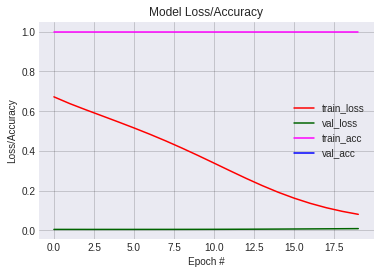

In [ ]:
cv_acc_=[x*0.01 for x in cv_acc]
plt.style.use('seaborn-darkgrid')
plt.figure()
plt.plot(train_loss, color = 'red')
plt.plot(cv_loss, color = 'darkgreen')
plt.plot(train_accuracy, color = 'magenta')
plt.plot(cv_acc_, color = 'blue')
plt.title('Model Loss/Accuracy')
plt.ylabel('Loss/Accuracy')
plt.xlabel('Epoch #')
plt.legend(['train_loss', 'train_acc'], loc='center right')
plt.legend(['train_loss', 'val_loss', 'train_acc', 'val_acc'], loc='center right')
plt.grid(axis = 'y', c = 'black', alpha = 0.2)
plt.grid(axis = 'x', c = 'black', alpha = 0.2)
plt.show()

In [ ]:
def test_inference(model, test_dataset):
  model.eval()
  loss, total, correct = 0.0, 0.0, 0.0

  device = 'cpu'
  criterion = nn.CrossEntropyLoss().to(device)
  idxs=[i for i in range(0,len(test_dataset[0]))]
  testloader = DataLoader(DatasetSplit(test_dataset, idxs), batch_size=128,
                          shuffle=True)
  images,labels =test_dataset[0],test_dataset[1]
  epochs=20
  test_loss,test_acc=[],[]
  for i in range(epochs):
    for batch_idx, (images, labels) in enumerate(testloader):
        images, labels = images.to(device), labels.to(device)
        labels=labels.type(torch.LongTensor)
        # Inference
        outputs = model(images)
        batch_loss = criterion(outputs, labels)
        loss += batch_loss.item()

        # Prediction
        _, pred_labels = torch.max(outputs, 1)
        pred_labels = pred_labels.view(-1)
        correct += torch.sum(torch.eq(pred_labels, labels.type(torch.LongTensor))).item()
        total += len(labels)

    loss=loss/total
    print(total)
    accuracy = correct/total
    test_loss.append(loss)
    test_acc.append(accuracy)
    print(f' \nAvg Testing Stats after {i+1} global rounds:')
    print(f'Testing Loss : {np.mean(np.array(test_loss))}')
    print('Test Accuracy: {:.2f}% \n'.format(100*test_acc[-1]))


  print(f'Avg Testing Loss : {np.mean(np.array(test_loss))}')
  print('Testing Accuracy: {:.2f}% \n'.format(100*test_acc[-1]))
  return test_acc,test_loss

In [ ]:
# Test inference after completion of training
test_acc, test_loss = test_inference(global_model, test_data)

#print(f' \n Results after {epochs} global rounds of training:')
print(f'Training Loss : {np.mean(np.array(train_loss))}')
print(f'Testing Loss : {np.mean(np.array(test_loss))}')
#print("|---- Avg Train Accuracy: {:.2f}%".format(100*train_acc))
#print("|---- Test Accuracy: {:.2f}".format(test_acc))


1705.0
 
Avg Testing Stats after 1 global rounds:
Testing Loss : 0.006843450307146895
Test Accuracy: 70.09% 

3410.0
 
Avg Testing Stats after 2 global rounds:
Testing Loss : 0.0051650572298907495
Test Accuracy: 70.09% 

5115.0
 
Avg Testing Stats after 3 global rounds:
Testing Loss : 0.004212626656881528
Test Accuracy: 70.09% 

6820.0
 
Avg Testing Stats after 4 global rounds:
Testing Loss : 0.0036015091243433773
Test Accuracy: 70.09% 

8525.0
 
Avg Testing Stats after 5 global rounds:
Testing Loss : 0.0031570400039012667
Test Accuracy: 70.09% 

10230.0
 
Avg Testing Stats after 6 global rounds:
Testing Loss : 0.002821831255330578
Test Accuracy: 70.09% 

11935.0
 
Avg Testing Stats after 7 global rounds:
Testing Loss : 0.0025594815144452977
Test Accuracy: 70.09% 

13640.0
 
Avg Testing Stats after 8 global rounds:
Testing Loss : 0.0023484638764375556
Test Accuracy: 70.09% 

15345.0
 
Avg Testing Stats after 9 global rounds:
Testing Loss : 0.0021720232338297406
Test Accuracy: 70.09% 



<ipython-input-34-b73d6983d88a>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


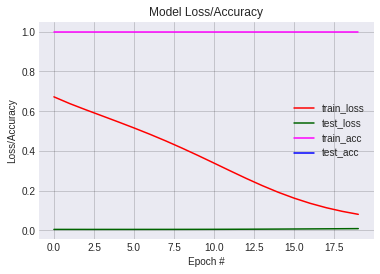

In [ ]:
plt.style.use('seaborn-darkgrid')
plt.figure()
plt.plot(train_loss, color = 'red')
plt.plot(cv_loss, color = 'darkgreen')
plt.plot(train_accuracy, color = 'magenta')
plt.plot(cv_acc, color = 'blue')
plt.title('Model Loss/Accuracy')
plt.ylabel('Loss/Accuracy')
plt.xlabel('Epoch #')
plt.legend(['train_loss', 'test_loss', 'train_acc', 'test_acc'], loc='center right')
plt.grid(axis = 'y', c = 'black', alpha = 0.2)
plt.grid(axis = 'x', c = 'black', alpha = 0.2)
plt.show()